# Artivatic Data Labs Pvt. Ltd

Problem Statement:
The Bank Indessa has not done well in the last 3 quarters. Their NPAs (Non Performing Assets) have reached all time high. It is starting to lose the confidence of its investors. As a result, it’s stock has fallen by 20% in the previous quarter alone.
After careful analysis, it was found that the majority of NPA was contributed by loan defaulters. With the messy data collected over all the years, this bank has decided to use machine learning to figure out a way to find these defaulters and devise a plan to reduce them.
This bank uses a pool of investors to sanction their loans. For example: If any customer has applied for a loan of $20000, along with the bank, the investors perform due diligence on the requested loan application. Keep this in mind while understanding data.
In this challenge, you will help this bank by predicting the probability that a member will default

By Vishal Raj
raj.19@iitj.ac.in /vishal.vishalraj@gmail.com

In [1]:
#Importing packages
from datetime import datetime
import numpy as np
import pandas as pd
import xgboost
from sklearn.metrics import accuracy_score
from sklearn.metrics import auc
from sklearn.metrics import roc_auc_score
from sklearn.model_selection import train_test_split
import math

## Upload the training dataset

In [2]:
dfTrain = pd.read_csv('train_indessa.csv')
dfTest = pd.read_csv('test_indessa.csv')

In [3]:
dfTrain.head() 

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36 months,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36 months,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36 months,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36 months,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36 months,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [4]:
dfTest.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60 months,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60 months,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60 months,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60 months,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36 months,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0


Find the shape of the dataframe? and find out all columns are present in the dataframe?

In [5]:
dfTrain.shape


(532428, 45)

In [6]:
dfTest.shape

(354951, 44)

In [7]:
dfTrain.columns


Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim',
       'loan_status'],
      dtype='object')

In [8]:
dfTest.columns

Index(['member_id', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'term',
       'batch_enrolled', 'int_rate', 'grade', 'sub_grade', 'emp_title',
       'emp_length', 'home_ownership', 'annual_inc', 'verification_status',
       'pymnt_plan', 'desc', 'purpose', 'title', 'zip_code', 'addr_state',
       'dti', 'delinq_2yrs', 'inq_last_6mths', 'mths_since_last_delinq',
       'mths_since_last_record', 'open_acc', 'pub_rec', 'revol_bal',
       'revol_util', 'total_acc', 'initial_list_status', 'total_rec_int',
       'total_rec_late_fee', 'recoveries', 'collection_recovery_fee',
       'collections_12_mths_ex_med', 'mths_since_last_major_derog',
       'application_type', 'verification_status_joint', 'last_week_pay',
       'acc_now_delinq', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim'],
      dtype='object')

In [9]:
dfTrain.describe()


,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
count,5.324280e+05,532428.000000,532428.000000,532428.000000,532428.000000,5.324250e+05,532428.000000,532412.000000,532412.000000,259874.000000,...,532428.000000,532428.000000,532428.000000,532333.000000,132980.000000,532412.000000,490424.000000,4.904240e+05,4.904240e+05,532428.000000
mean,3.500547e+07,14757.595722,14744.271291,14704.926696,13.242969,7.502984e+04,18.138767,0.314448,0.694603,34.055735,...,0.394954,45.717832,4.859221,0.014299,44.121462,0.005015,213.562222,1.395541e+05,3.208057e+04,0.236327
std,2.412148e+07,8434.420080,8429.139277,8441.290381,4.379611,6.519985e+04,8.369074,0.860045,0.997025,21.884797,...,4.091546,409.647467,63.123361,0.133005,22.198410,0.079117,1958.571538,1.539149e+05,3.805304e+04,0.424826
min,7.047300e+04,500.000000,500.000000,0.000000,5.320000,1.200000e+03,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000
25%,1.086688e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.930000,0.000000,0.000000,15.000000,...,0.000000,0.000000,0.000000,0.000000,27.000000,0.000000,0.000000,2.983975e+04,1.400000e+04,0.000000
50%,3.709590e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,0.000000,0.000000,0.000000,0.000000,44.000000,0.000000,0.000000,8.066950e+04,2.370000e+04,0.000000
75%,5.848920e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.950000,0.000000,1.000000,50.000000,...,0.000000,0.000000,0.000000,0.000000,61.000000,0.000000,0.000000,2.084792e+05,3.980000e+04,0.000000
max,7.354484e+07,35000.000000,35000.000000,35000.000000,28.990000,9.500000e+06,672.520000,30.000000,31.000000,180.000000,...,358.680000,33520.270000,7002.190000,16.000000,180.000000,14.000000,496651.000000,8.000078e+06,9.999999e+06,1.000000


In [10]:
dfTest.describe()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,int_rate,annual_inc,dti,delinq_2yrs,inq_last_6mths,mths_since_last_delinq,...,total_rec_int,total_rec_late_fee,recoveries,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
count,3.549510e+05,354951.000000,354951.000000,354951.000000,354951.000000,3.549500e+05,354951.000000,354938.000000,354938.000000,173193.000000,...,354951.000000,354951.000000,354951.000000,354951.000000,354901.00000,88723.000000,354938.000000,3.266790e+05,3.266790e+05,3.266790e+05
mean,3.499635e+07,14751.767920,14738.287116,14698.770903,13.252396,7.502420e+04,18.184447,0.314432,0.694654,34.075898,...,1756.867641,0.399299,46.221362,4.913062,0.01450,44.079923,0.004956,2.439283e+02,1.393142e+05,3.205068e+04
std,2.410120e+07,8437.019324,8431.045701,8443.341658,4.385250,6.393870e+04,25.174050,0.865533,1.000579,21.885212,...,2098.587607,4.082242,409.763865,63.128236,0.13595,22.152081,0.075333,1.613022e+04,1.535022e+05,3.664969e+04
min,7.062600e+04,500.000000,500.000000,0.000000,5.320000,0.000000e+00,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.088941e+07,8000.000000,8000.000000,8000.000000,9.990000,4.500000e+04,11.890000,0.000000,0.000000,15.000000,...,441.345000,0.000000,0.000000,0.000000,0.00000,27.000000,0.000000,0.000000e+00,2.987350e+04,1.390000e+04
50%,3.708650e+07,13000.000000,13000.000000,13000.000000,12.990000,6.500000e+04,17.650000,0.000000,0.000000,31.000000,...,1074.120000,0.000000,0.000000,0.000000,0.00000,44.000000,0.000000,0.000000e+00,8.036900e+04,2.370000e+04
75%,5.844892e+07,20000.000000,20000.000000,20000.000000,16.200000,9.000000e+04,23.940000,0.000000,1.000000,50.000000,...,2243.075000,0.000000,0.000000,0.000000,0.00000,61.000000,0.000000,0.000000e+00,2.078005e+05,3.970000e+04
max,7.354483e+07,35000.000000,35000.000000,35000.000000,28.990000,9.000000e+06,9999.000000,39.000000,33.000000,188.000000,...,23062.450000,286.747566,29282.070000,5569.920000,20.00000,188.000000,5.000000,9.152545e+06,4.447397e+06,9.999999e+06


In [11]:
dfTrain.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 532428 entries, 0 to 532427
Data columns (total 45 columns):
member_id                      532428 non-null int64
loan_amnt                      532428 non-null int64
funded_amnt                    532428 non-null int64
funded_amnt_inv                532428 non-null float64
term                           532428 non-null object
batch_enrolled                 447279 non-null object
int_rate                       532428 non-null float64
grade                          532428 non-null object
sub_grade                      532428 non-null object
emp_title                      501595 non-null object
emp_length                     505537 non-null object
home_ownership                 532428 non-null object
annual_inc                     532425 non-null float64
verification_status            532428 non-null object
pymnt_plan                     532428 non-null object
desc                           75599 non-null object
purpose                   

In [12]:
dfTest.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354951 entries, 0 to 354950
Data columns (total 44 columns):
member_id                      354951 non-null int64
loan_amnt                      354951 non-null int64
funded_amnt                    354951 non-null int64
funded_amnt_inv                354951 non-null float64
term                           354951 non-null object
batch_enrolled                 309352 non-null object
int_rate                       354951 non-null float64
grade                          354951 non-null object
sub_grade                      354951 non-null object
emp_title                      334322 non-null object
emp_length                     337017 non-null object
home_ownership                 354951 non-null object
annual_inc                     354950 non-null float64
verification_status            354951 non-null object
pymnt_plan                     354951 non-null object
desc                           50181 non-null object
purpose                   

## 2. Preprocessing the Dataset

finding the distribution of our target variable?

In [13]:
dfTrain['loan_status'].value_counts()

0    406601
1    125827
Name: loan_status, dtype: int64

## 2.1 Term Feature
We'll do some preprocessing for the term attribute.

Now, let's so some data cleaning. We'll remove months from term column.

In [14]:
dfTrain['term'] = dfTrain['term'].str.replace('months', '') # Removes months
dfTrain['term'] = dfTrain['term'].str.replace(' ', "")      # Removes the space left out after removing months

In [15]:

dfTest['term'].replace(to_replace=' months', value='', regex=True, inplace=True)
dfTest['term'] = pd.to_numeric(dfTest['term'], errors='coerce')

Let's check if we removed them and if the column just contains integers.

In [16]:
dfTrain.term.unique() 

array(['36', '60'], dtype=object)

In [17]:
dfTest.term.unique() 

array([60, 36], dtype=int64)

## 2.2 Employment Length Feature
We'll do some preprocessing for the emp_length attribute. We'll now clean the emp_length column in our dataframe.

In [18]:

dfTrain['emp_length'].replace('n/a', '0', inplace=True)
dfTrain['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True) 
dfTrain['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True) 
dfTrain['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTrain['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)
dfTest['emp_length'].replace('n/a', '0', inplace=True)
dfTest['emp_length'].replace(to_replace='\+ years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' years', value='', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace='< 1 year', value='0', regex=True, inplace=True)
dfTest['emp_length'].replace(to_replace=' year', value='', regex=True, inplace=True)

# Convert it to numeric
dfTrain['emp_length'] = pd.to_numeric(dfTrain['emp_length'], errors='coerce')
dfTest['emp_length'] = pd.to_numeric(dfTest['emp_length'], errors='coerce')


In [19]:
dfTrain.head() 

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,E3,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26th week,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,B4,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,A4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9th week,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,D5,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135th week,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,B2,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96th week,0.0,0.0,47159.0,47033.0,0


In [20]:
dfTest.head() 

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60,BAT4711174,16.24,C,C5,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104th week,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60,BAT4318899,9.49,B,B2,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57th week,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60,BAT446479,15.61,D,D1,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70th week,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60,BAT4664105,12.69,C,C2,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36,,6.89,A,A3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22th week,0.0,0.0,234278.0,26700.0



Let's have a look at the unique value distribution of the emp_length column.

In [21]:
dfTrain['emp_length'].value_counts()

10.0    175105
2.0      47276
0.0      42253
3.0      42175
1.0      34202
5.0      33393
4.0      31581
7.0      26680
8.0      26443
6.0      25741
9.0      20688
Name: emp_length, dtype: int64

In [22]:
dfTest['emp_length'].value_counts()

10.0    116464
2.0      31594
0.0      28352
3.0      27851
1.0      22893
5.0      22311
4.0      20948
7.0      17914
8.0      17512
6.0      17209
9.0      13969
Name: emp_length, dtype: int64

Let's check if the column is cleaned and contains only distinct integers. We'll be dealing with nan values later.

In [23]:
dfTrain.emp_length.unique()

array([ 9.,  0.,  2., 10.,  5.,  8.,  7.,  4., nan,  1.,  3.,  6.])

In [24]:
dfTest.emp_length.unique()

array([ 4.,  5., 10.,  9.,  2.,  7.,  6., nan,  1.,  3.,  0.,  8.])

How many nan values does the emp_length have?

In [25]:
dfTrain.emp_length.isnull().sum() 

26891

In [26]:
dfTest.emp_length.isnull().sum() 

17934

## 2.3 Last Week Pay Feature
We'll now clean the last_week_pay column in our dataframe.

In [27]:

dfTrain['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='th week', value='', regex=True, inplace=True)
dfTrain['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)
dfTest['last_week_pay'].replace(to_replace='NA', value='', regex=True, inplace=True)

# Convert it to numeric
dfTrain['last_week_pay'] = pd.to_numeric(dfTrain['last_week_pay'], errors='coerce')
dfTest['last_week_pay'] = pd.to_numeric(dfTest['last_week_pay'], errors='coerce')


## 2.4 Sub Grade Feature
We'll do some preprocessing for the sub_grade attribute.

In [28]:
print('Transform: sub_grade...')
dfTrain['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTrain['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='A', value='0', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='B', value='1', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='C', value='2', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='D', value='3', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='E', value='4', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='F', value='5', regex=True, inplace=True)
dfTest['sub_grade'].replace(to_replace='G', value='6', regex=True, inplace=True)
dfTrain['sub_grade'] = pd.to_numeric(dfTrain['sub_grade'], errors='coerce')
dfTest['sub_grade'] = pd.to_numeric(dfTest['sub_grade'], errors='coerce')

# Convert it to numeric
dfTrain['sub_grade'] = pd.to_numeric(dfTrain['sub_grade'], errors='coerce')
dfTest['sub_grade'] = pd.to_numeric(dfTest['sub_grade'], errors='coerce')


Transform: sub_grade...


In [29]:
dfTrain.head() 

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim,loan_status
0,58189336,14350,14350,14350.0,36,,19.19,E,43,clerk,...,0.0,74.0,INDIVIDUAL,NaN,26.0,0.0,0.0,28699.0,30800.0,0
1,70011223,4800,4800,4800.0,36,BAT1586599,10.99,B,14,Human Resources Specialist,...,0.0,NaN,INDIVIDUAL,NaN,9.0,0.0,0.0,9974.0,32900.0,0
2,70255675,10000,10000,10000.0,36,BAT1586599,7.26,A,4,Driver,...,0.0,NaN,INDIVIDUAL,NaN,9.0,0.0,65.0,38295.0,34900.0,0
3,1893936,15000,15000,15000.0,36,BAT4808022,19.72,D,35,Us office of Personnel Management,...,0.0,NaN,INDIVIDUAL,NaN,135.0,0.0,0.0,55564.0,24700.0,0
4,7652106,16000,16000,16000.0,36,BAT2833642,10.64,B,12,LAUSD-HOLLYWOOD HIGH SCHOOL,...,0.0,NaN,INDIVIDUAL,NaN,96.0,0.0,0.0,47159.0,47033.0,0


In [30]:
dfTest.head() 

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,batch_enrolled,int_rate,grade,sub_grade,emp_title,...,collection_recovery_fee,collections_12_mths_ex_med,mths_since_last_major_derog,application_type,verification_status_joint,last_week_pay,acc_now_delinq,tot_coll_amt,tot_cur_bal,total_rev_hi_lim
0,11937648,14000,14000,14000.0,60,BAT4711174,16.24,C,25,Data Analyst,...,0.0,0.0,NaN,INDIVIDUAL,NaN,104.0,0.0,0.0,85230.0,45700.0
1,38983318,16000,16000,16000.0,60,BAT4318899,9.49,B,12,Senior Database Administrator,...,0.0,0.0,NaN,INDIVIDUAL,NaN,57.0,0.0,0.0,444991.0,21400.0
2,27999917,11050,11050,11050.0,60,BAT446479,15.61,D,31,Customer service representative,...,0.0,0.0,26.0,INDIVIDUAL,NaN,70.0,0.0,0.0,105737.0,16300.0
3,61514932,35000,35000,34700.0,60,BAT4664105,12.69,C,22,ACCT OFFICER,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22.0,0.0,0.0,287022.0,72400.0
4,59622821,6500,6500,6500.0,36,,6.89,A,3,Paralegal,...,0.0,0.0,NaN,INDIVIDUAL,NaN,22.0,0.0,0.0,234278.0,26700.0


Let's have a look at the unique value distribution of the sub_grade column.

In [31]:
dfTrain['sub_grade'].value_counts()

13    33844
14    33198
21    31975
22    31356
23    30080
12    29390
15    29313
24    29103
5     27016
11    26968
25    24985
31    21712
4     20823
32    17991
33    15771
34    15226
3     14082
1     13653
2     13533
35    12867
41    10928
42    10255
43     8488
44     7051
45     5773
51     4350
52     3196
53     2708
54     2056
55     1516
61     1112
62      824
63      559
64      391
65      335
Name: sub_grade, dtype: int64

In [32]:
dfTest['sub_grade'].value_counts()

13    22479
14    22428
21    21412
22    20880
23    20081
24    19754
15    19520
12    19391
11    18004
5     17800
25    16234
31    14526
4     13708
32    11812
33    10783
34    10332
3      9375
1      9260
2      8952
35     8522
41     7340
42     6749
43     5646
44     4673
45     3802
51     2868
52     2196
53     1725
54     1353
55     1078
61      759
62      574
63      422
64      272
65      241
Name: sub_grade, dtype: int64

## 3. Handling Missing Values
Now, we'll see how many null values does each attribute have.

In [33]:

dfTrain.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                      26891
home_ownership                      0
annual_inc                          3
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq         272554
mths_since_last_record         450305
open_acc                           16
pub_rec     

In [34]:

dfTest.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                      17934
home_ownership                      0
annual_inc                          1
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq         181758
mths_since_last_record         300021
open_acc                           13
pub_rec     

## 3.1 Missing value imputation

In [35]:
columns = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade',
           'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
           'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 
           'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in columns:
    print('Imputation with Median: %s' % (col))
    dfTrain[col].fillna(dfTrain[col].median(), inplace=True)  # Filling NaN values with median of each column present in columns.

  
num_cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in num_cols:
    print('Imputation with Zero: %s' % (col))
    dfTrain[col].fillna(0, inplace=True)        ## Filling NaN values with 0 for each column present in columns.

print('Missing value imputation done for training data.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med
Missing value imputation done for training data.


In [36]:
columns = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade',
           'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc',
           'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 
           'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in columns:
    print('Imputation with Median: %s' % (col))
    dfTest[col].fillna(dfTest[col].median(), inplace=True)  # Filling NaN values with median of each column present in columns.

  
num_cols = ['acc_now_delinq', 'total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in num_cols:
    print('Imputation with Zero: %s' % (col))
    dfTest[col].fillna(0, inplace=True)        ## Filling NaN values with 0 for each column present in columns.

print('Missing value imputation done for testing data.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: total_rec_late_fee
Imputation with Zero: recoveries
Imputation with Zero: collection_recovery_fee
Imputation with Zero: collections_12_mths_ex_med
Missing value imputation done for testing data.


In [37]:
dfTrain.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  85149
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       30833
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
pymnt_plan                          0
desc                           456829
purpose                             0
title                              90
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        16
inq_last_6mths                     16
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
pub_rec     

In [38]:
dfTest.isnull().sum()

member_id                           0
loan_amnt                           0
funded_amnt                         0
funded_amnt_inv                     0
term                                0
batch_enrolled                  45599
int_rate                            0
grade                               0
sub_grade                           0
emp_title                       20629
emp_length                          0
home_ownership                      0
annual_inc                          0
verification_status                 0
pymnt_plan                          0
desc                           304770
purpose                             0
title                              62
zip_code                            0
addr_state                          0
dti                                 0
delinq_2yrs                        13
inq_last_6mths                     13
mths_since_last_delinq              0
mths_since_last_record              0
open_acc                            0
pub_rec     

In [39]:
dfTrain.replace([np.inf, -np.inf], np.nan, inplace=True)
dfTest.replace([np.inf, -np.inf], np.nan, inplace=True)

In [40]:
'''
Missing values imputation
'''
cols = ['term', 'loan_amnt', 'funded_amnt', 'last_week_pay', 'int_rate', 'sub_grade', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'mths_since_last_major_derog', 'tot_coll_amt', 'tot_cur_bal', 'total_rev_hi_lim', 'emp_length']
for col in cols:
    print('Imputation with Median: %s' % (col))
    dfTrain[col].fillna(dfTrain[col].median(), inplace=True)
    dfTest[col].fillna(dfTest[col].median(), inplace=True)

cols = ['acc_now_delinq', 'batch_enrolled','emp_title','desc','title','delinq_2yrs','inq_last_6mths','pub_rec','verification_status_joint','total_rec_late_fee', 'recoveries', 'collection_recovery_fee', 'collections_12_mths_ex_med']
for col in cols:
    print('Imputation with Zero: %s' % (col))
    dfTrain[col].fillna(0, inplace=True)
    dfTest[col].fillna(0, inplace=True)

print('Missing value imputation done.')

Imputation with Median: term
Imputation with Median: loan_amnt
Imputation with Median: funded_amnt
Imputation with Median: last_week_pay
Imputation with Median: int_rate
Imputation with Median: sub_grade
Imputation with Median: annual_inc
Imputation with Median: dti
Imputation with Median: mths_since_last_delinq
Imputation with Median: mths_since_last_record
Imputation with Median: open_acc
Imputation with Median: revol_bal
Imputation with Median: revol_util
Imputation with Median: total_acc
Imputation with Median: total_rec_int
Imputation with Median: mths_since_last_major_derog
Imputation with Median: tot_coll_amt
Imputation with Median: tot_cur_bal
Imputation with Median: total_rev_hi_lim
Imputation with Median: emp_length
Imputation with Zero: acc_now_delinq
Imputation with Zero: batch_enrolled
Imputation with Zero: emp_title
Imputation with Zero: desc
Imputation with Zero: title
Imputation with Zero: delinq_2yrs
Imputation with Zero: inq_last_6mths
Imputation with Zero: pub_rec
Im

In [41]:
dfTest.isnull().sum()

member_id                      0
loan_amnt                      0
funded_amnt                    0
funded_amnt_inv                0
term                           0
batch_enrolled                 0
int_rate                       0
grade                          0
sub_grade                      0
emp_title                      0
emp_length                     0
home_ownership                 0
annual_inc                     0
verification_status            0
pymnt_plan                     0
desc                           0
purpose                        0
title                          0
zip_code                       0
addr_state                     0
dti                            0
delinq_2yrs                    0
inq_last_6mths                 0
mths_since_last_delinq         0
mths_since_last_record         0
open_acc                       0
pub_rec                        0
revol_bal                      0
revol_util                     0
total_acc                      0
initial_li

## 4. Exploratory Data Analysis 

In [42]:
import seaborn as sns
from matplotlib import pyplot as plt
import matplotlib
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')

## categorical attributes visualization

## 4.1 Loan Status Vs Grade

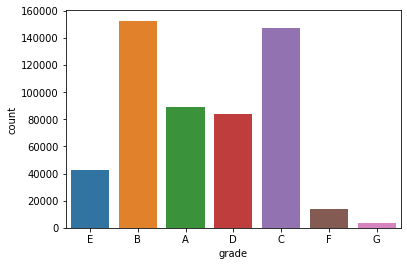

In [43]:
sns.countplot(dfTrain['grade'])

Overview of the above chart:

Most of the Loans (irrespective of Defaulter or Non-Defaulter) were taken by B grade.
Least of the Loans (irrespective of Defaulter or Non-Defaulter) were taken by G grade.
Top 3 loan takers are - B, C and A grade.

## 4.2 Home Ownership Vs Grade

In [44]:
dfTrain.home_ownership.unique()



array(['OWN', 'MORTGAGE', 'RENT', 'OTHER', 'NONE', 'ANY'], dtype=object)

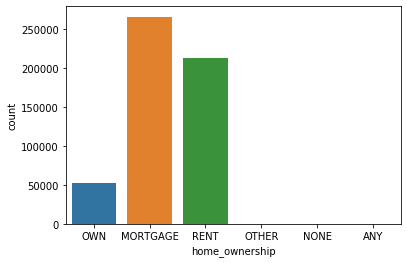

In [45]:
sns.countplot(dfTrain["home_ownership"])

In [46]:
dfTrain["home_ownership"]

0              OWN
1         MORTGAGE
2              OWN
3             RENT
4             RENT
            ...   
532423    MORTGAGE
532424    MORTGAGE
532425        RENT
532426        RENT
532427        RENT
Name: home_ownership, Length: 532428, dtype: object

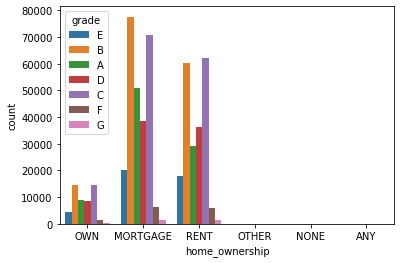

In [47]:

sns.countplot(x ="home_ownership",hue="grade", data = dfTrain)
plt.show()


Overview of the above chart:

Most of the Home Ownerships were taken by B and C grade.
Least of the Home Ownerships were taken by G grade.
Top 3 - B, C and A grade.

## 4.3 Loan Status Vs Verification Status

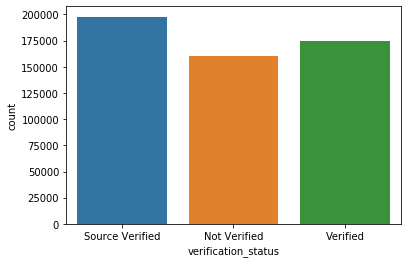

In [48]:
sns.countplot(dfTrain["verification_status"])

Overview of the above chart:

Most of the Loans (irrespective of Defaulter or Non-Defaulter) were Not Verified.
Least of the Loans (irrespective of Defaulter or Non-Defaulter) were Source Verified.
If we consider Source Verified and Verified to be the same, then most of the loans were Verified but still quite a good amount of Loans (35.7%) were not Verified.

## 4.4 Loan Status Vs Term

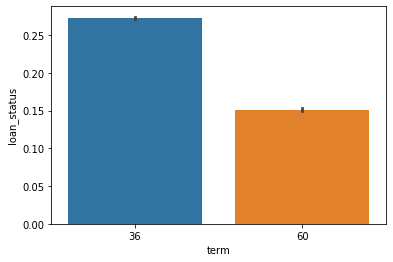

In [49]:
sns.barplot(x = "term", y = "loan_status", data = dfTrain)
plt.show()

Overview of the above chart:

Most of the Loans (irrespective of Defaulter or Non-Defaulter) were taken for a term of 36 months.
This clearly shows that most of the Customers likes a short term loan rather than a long term loan.

## 4.5 Loan Status Vs Employment Length 

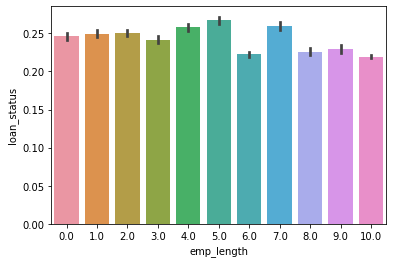

In [50]:
sns.barplot(x = "emp_length", y = "loan_status", data = dfTrain)
plt.show()

Overview of the above chart:

Most of the Loans (irrespective of Defaulter or Non-Defaulter) were 5 years employed.
Least of the Loans (irrespective of Defaulter or Non-Defaulter) were 6 years employed.

## 4.6 Purpose Vs loan status

In [51]:
dfTrain.loan_status.unique()

array([0, 1], dtype=int64)

In [52]:
dfTrain.purpose.unique()

array(['debt_consolidation', 'home_improvement', 'credit_card', 'other',
       'major_purchase', 'small_business', 'vacation', 'car', 'moving',
       'medical', 'wedding', 'renewable_energy', 'house', 'educational'],
      dtype=object)

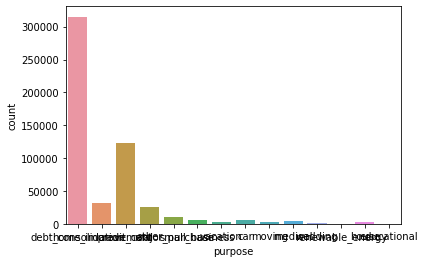

In [53]:
sns.countplot(dfTrain["purpose"])

The overview of this chart:

Most of the Loans (irrespective of Defaulter or Non-Defaulter) were taken for Debt Consolidation Purposes.
Least of the Loans (irrespective of Defaulter or Non-Defaulter) were taken for Wedding, Moving, House, Vacation, Educational, Renewable Energy Purposes.
This shows us that more than half the customers take loan for Debt Consolidation only.

## 5. Feature Engineering


Now, we'll create some new features which can help us in predicting the target (Defaulter or Non-Defaulter).

In [55]:
'''
Feature Engineering
'''

# Separating the member_id column of test dataframe to help create a csv after predictions
test_member_id = pd.DataFrame(dfTest['member_id'])


# Creating target variable pandas series from train dataframe, this will be used by cross validation to calculate
# the accuracy of the model
train_target = pd.DataFrame(dfTrain['loan_status'])


# It's good to create a copy of train and test dataframes. this way we can play around different features as we tune the
# performance of the classifier with important features
selected_cols = ['member_id', 'emp_length', 'loan_amnt', 'funded_amnt', 'funded_amnt_inv', 'sub_grade', 'int_rate', 'annual_inc', 'dti', 'mths_since_last_delinq', 'mths_since_last_record', 'open_acc', 'revol_bal', 'revol_util', 'total_acc', 'total_rec_int', 'total_rec_late_fee', 'mths_since_last_major_derog', 'last_week_pay', 'tot_cur_bal', 'total_rev_hi_lim', 'tot_coll_amt', 'recoveries', 'collection_recovery_fee', 'term', 'acc_now_delinq', 'collections_12_mths_ex_med']
finalTrain = dfTrain[selected_cols]
finalTest = dfTest[selected_cols]

# How big the loan a person has taken with respect to his earnings, annual income to loan amount ratio
finalTrain['loan_to_income'] = finalTrain['annual_inc']/finalTrain['funded_amnt_inv']
finalTest['loan_to_income'] = finalTest['annual_inc']/finalTest['funded_amnt_inv']


# All these attributes indicate that the repayment was not all hunky-dory. All the amounts caclulated are ratios 
# like, recovery to the loan amount. This column gives a magnitude of how much the repayment has gone off course 
# in terms of ratios.
finalTrain['bad_state'] = finalTrain['acc_now_delinq'] + (finalTrain['total_rec_late_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['recoveries']/finalTrain['funded_amnt_inv']) + (finalTrain['collection_recovery_fee']/finalTrain['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTrain['funded_amnt_inv'])
finalTest['bad_state'] = finalTest['acc_now_delinq'] + (finalTest['total_rec_late_fee']/finalTest['funded_amnt_inv']) + (finalTest['recoveries']/finalTest['funded_amnt_inv']) + (finalTest['collection_recovery_fee']/finalTest['funded_amnt_inv']) + (finalTrain['collections_12_mths_ex_med']/finalTest['funded_amnt_inv'])

# For the sake of this model, I have used just a boolean flag if things had gone bad, with this case I didn't see
# a benifit of including above computations
finalTrain.loc[finalTrain['bad_state'] > 0, 'bad_state'] = 1
finalTest.loc[finalTest['bad_state'] > 0, 'bad_state'] = 1


# Total number of available/unused 'credit lines'
finalTrain['avl_lines'] = finalTrain['total_acc'] - finalTrain['open_acc']
finalTest['avl_lines'] = finalTest['total_acc'] - finalTest['open_acc']


# Interest paid so far
finalTrain['int_paid'] = finalTrain['total_rec_int'] + finalTrain['total_rec_late_fee']
finalTest['int_paid'] = finalTest['total_rec_int'] + finalTest['total_rec_late_fee']




In [56]:
# Calculating EMIs paid (in terms of percent)
finalTrain['emi_paid_progress_perc'] = ((finalTrain['last_week_pay'].astype(int)/(finalTrain['term'].astype(int)/12*52+1))*100)
finalTest['emi_paid_progress_perc'] = ((finalTest['last_week_pay'].astype(int)/(finalTest['term'].astype(int)/12*52+1))*100)



In [57]:
# Calculating total repayments received so far, in terms of EMI or recoveries after charge off
finalTrain['total_repayment_progress'] = ((finalTrain['last_week_pay'].astype(int)/(finalTrain['term'].astype(int)/12*52+1))*100) + ((finalTrain['recoveries'].astype(int)/finalTrain['funded_amnt_inv'].astype(int)) * 100)
finalTest['total_repayment_progress'] = ((finalTest['last_week_pay'].astype(int)/(finalTest['term'].astype(int)/12*52+1))*100) + ((finalTest['recoveries'].astype(int)/finalTest['funded_amnt_inv'].astype(int)) * 100)


In [58]:
finalTrain.replace([np.inf, -np.inf], np.nan, inplace=True)
finalTest.replace([np.inf, -np.inf], np.nan, inplace=True)

In [59]:
finalTrain.isnull().sum()

member_id                        0
emp_length                       0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
sub_grade                        0
int_rate                         0
annual_inc                       0
dti                              0
mths_since_last_delinq           0
mths_since_last_record           0
open_acc                         0
revol_bal                        0
revol_util                       0
total_acc                        0
total_rec_int                    0
total_rec_late_fee               0
mths_since_last_major_derog      0
last_week_pay                    0
tot_cur_bal                      0
total_rev_hi_lim                 0
tot_coll_amt                     0
recoveries                       0
collection_recovery_fee          0
term                             0
acc_now_delinq                   0
collections_12_mths_ex_med       0
loan_to_income                 139
bad_state           

In [60]:
finalTest.isnull().sum()

member_id                        0
emp_length                       0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
sub_grade                        0
int_rate                         0
annual_inc                       0
dti                              0
mths_since_last_delinq           0
mths_since_last_record           0
open_acc                         0
revol_bal                        0
revol_util                       0
total_acc                        0
total_rec_int                    0
total_rec_late_fee               0
mths_since_last_major_derog      0
last_week_pay                    0
tot_cur_bal                      0
total_rev_hi_lim                 0
tot_coll_amt                     0
recoveries                       0
collection_recovery_fee          0
term                             0
acc_now_delinq                   0
collections_12_mths_ex_med       0
loan_to_income                  94
bad_state           

In [61]:
finalTrain["bad_state"].fillna(0, inplace = True)
finalTest["bad_state"].fillna(0, inplace = True)
finalTrain["total_repayment_progress"].fillna(0, inplace = True)
finalTest["total_repayment_progress"].fillna(finalTest["total_repayment_progress"].median(), inplace = True)
finalTest["total_repayment_progress"].fillna(finalTest["total_repayment_progress"].median(), inplace = True)

finalTrain.isnull().sum()


member_id                        0
emp_length                       0
loan_amnt                        0
funded_amnt                      0
funded_amnt_inv                  0
sub_grade                        0
int_rate                         0
annual_inc                       0
dti                              0
mths_since_last_delinq           0
mths_since_last_record           0
open_acc                         0
revol_bal                        0
revol_util                       0
total_acc                        0
total_rec_int                    0
total_rec_late_fee               0
mths_since_last_major_derog      0
last_week_pay                    0
tot_cur_bal                      0
total_rev_hi_lim                 0
tot_coll_amt                     0
recoveries                       0
collection_recovery_fee          0
term                             0
acc_now_delinq                   0
collections_12_mths_ex_med       0
loan_to_income                 139
bad_state           

## 7. Train-Test Split
We'll spit our data in training and cross-validation sets.

In [62]:
#Split data set into train-test-cv
#Train model & predict
X_train, X_test, y_train, y_test = train_test_split(np.array(finalTrain), np.array(train_target), test_size=0.30)
eval_set=[(X_test, y_test)]

In [63]:
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((372699, 33), (372699, 1), (159729, 33), (159729, 1))

Initializing xgboost.sklearn.XGBClassifier and starting training...
[0]	validation_0-auc:0.96803
[1]	validation_0-auc:0.96862
[2]	validation_0-auc:0.96975
[3]	validation_0-auc:0.97013
[4]	validation_0-auc:0.97052
[5]	validation_0-auc:0.97114
[6]	validation_0-auc:0.97163
[7]	validation_0-auc:0.97195
[8]	validation_0-auc:0.97208
[9]	validation_0-auc:0.97237
[10]	validation_0-auc:0.97261
[11]	validation_0-auc:0.97267
[12]	validation_0-auc:0.97277
[13]	validation_0-auc:0.97284
[14]	validation_0-auc:0.97288
[15]	validation_0-auc:0.97293
[16]	validation_0-auc:0.97302
[17]	validation_0-auc:0.97305
[18]	validation_0-auc:0.97308
[19]	validation_0-auc:0.97321
[20]	validation_0-auc:0.97324
[21]	validation_0-auc:0.97331
[22]	validation_0-auc:0.97333
[23]	validation_0-auc:0.97330
[24]	validation_0-auc:0.97328
[25]	validation_0-auc:0.97334
[26]	validation_0-auc:0.97344
[27]	validation_0-auc:0.97353
[28]	validation_0-auc:0.97363
[29]	validation_0-auc:0.97368
[30]	validation_0-auc:0.97374
[31]	validat

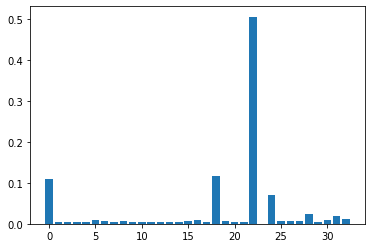

In [64]:
print('Initializing xgboost.sklearn.XGBClassifier and starting training...')

st = datetime.now()

clf = xgboost.sklearn.XGBClassifier(
    objective="binary:logistic", 
    learning_rate=0.05, 
    seed=9616, 
    max_depth=20, 
    gamma=10, 
    n_estimators=500)

clf.fit(X_train, y_train, early_stopping_rounds=20, eval_metric="auc", eval_set=eval_set, verbose=True)

print(datetime.now()-st)

y_pred = clf.predict(X_test)
submission_file_name = 'Submission_'

accuracy = accuracy_score(np.array(y_test).flatten(), y_pred)
print("Accuracy: %.10f%%" % (accuracy * 100.0))
submission_file_name = submission_file_name + ("_Accuracy_%.6f" % (accuracy * 100)) + '_'

accuracy_per_roc_auc = roc_auc_score(np.array(y_test).flatten(), y_pred)
print("ROC-AUC: %.10f%%" % (accuracy_per_roc_auc * 100))
submission_file_name = submission_file_name + ("_ROC-AUC_%.6f" % (accuracy_per_roc_auc * 100))

final_pred = pd.DataFrame(clf.predict_proba(np.array(finalTest)))
dfSub = pd.concat([test_member_id, final_pred.ix[:, 1:2]], axis=1)
dfSub.rename(columns={1:'loan_status'}, inplace=True)
dfSub.to_csv((('%s.csv') % (submission_file_name)), index=False)

import matplotlib.pyplot as plt
print(clf.feature_importances_)
idx = 0
for x in list(finalTrain):
    print('%d %s' % (idx, x))
    idx = idx + 1
plt.bar(range(len(clf.feature_importances_)), clf.feature_importances_)
plt.show()